In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
world_cups = [2018, 2022]

## 2018

page_18 = pd.read_html(f"https://fbref.com/en/comps/1/{world_cups[0]}/schedule/{world_cups[0]}-FIFA-World-Cup-Scores-and-Fixtures")
frame_18 = page_18[0]

frame_18 = frame_18[frame_18['Day'].notna()]
frame_18['TotalxG'] = frame_18['xG'] + frame_18['xG.1']
frame_18['Score'] = frame_18['Score'].astype('string')
frame_18 = frame_18.reset_index(drop=True)

frame_18[['Score1', 'Score2']] = frame_18['Score'].str.split('–', expand=True)

for i in range(len(frame_18)):
    frame_18['Score1'][i] = frame_18['Score1'][i][-1]
    frame_18['Score2'][i] = frame_18['Score2'][i][0]
    
frame_18['Score1'] = frame_18['Score1'].astype(int)
frame_18['Score2'] = frame_18['Score2'].astype(int)

frame_18['Goals'] = frame_18['Score1'] + frame_18['Score2']
frame_18['Diff'] = frame_18['Goals'].astype(float) - frame_18['TotalxG']

frame_18_group = frame_18.loc[frame_18['Round'] == "Group stage"]
frame_18_knockout = frame_18.loc[frame_18['Round'] != "Group stage"]

frame_18_round_one = frame_18_group.loc[frame_18_group['Wk'] == 1.0]
frame_18_round_two = frame_18_group.loc[frame_18_group['Wk'] == 2.0]
frame_18_round_three = frame_18_group.loc[frame_18_group['Wk'] == 3.0]
frame_18_round_of_16 = frame_18_knockout.loc[frame_18_knockout['Round'] == "Round of 16"]
frame_18_quarter = frame_18_knockout.loc[frame_18_knockout['Round'] == "Quarter-finals"]
frame_18_last_four = frame_18_knockout.iloc[-4:]

r1_18_avg_xg = frame_18_round_one['TotalxG'].mean()
r1_18_avg_goals = frame_18_round_one['Goals'].mean()

r2_18_avg_xg = frame_18_round_two['TotalxG'].mean()
r2_18_avg_goals = frame_18_round_two['Goals'].mean()

r3_18_avg_xg = frame_18_round_three['TotalxG'].mean()
r3_18_avg_goals = frame_18_round_three['Goals'].mean()

r16_18_avg_xg = frame_18_round_of_16['TotalxG'].mean()
r16_18_avg_goals = frame_18_round_of_16['Goals'].mean()

quarter_18_avg_xg = frame_18_quarter['TotalxG'].mean()
quarter_18_avg_goals = frame_18_quarter['Goals'].mean()

last_four_18_avg_xg = frame_18_last_four['TotalxG'].mean()
last_four_18_avg_goals = frame_18_last_four['Goals'].mean()

total_group_18_avg_xg = frame_18_group['TotalxG'].mean()
total_group_18_avg_goals = frame_18_group['Goals'].mean()

total_knockout_18_avg_xg = frame_18_knockout['TotalxG'].mean()
total_knockout_18_avg_goals = frame_18_knockout['Goals'].mean()

russia_2018_labels = ['18 Round One', '18 Round Two', '18 Round Three']

russia_2018_xG = [r1_18_avg_xg, r2_18_avg_xg, r3_18_avg_xg]

russia_2018_Gls = [r1_18_avg_goals, r2_18_avg_goals, r3_18_avg_goals]

df_2018 = pd.DataFrame(list(zip(russia_2018_labels, russia_2018_xG, russia_2018_Gls)), columns=['Stage', 'xG', 'Gls'])

## 2022

page_22 = pd.read_html(f"https://fbref.com/en/comps/1/{world_cups[1]}/schedule/{world_cups[1]}-FIFA-World-Cup-Scores-and-Fixtures")
frame_22 = page_22[0]

frame_22 = frame_22[frame_22['Day'].notna()]
frame_22 = frame_22[frame_22['xG'].notna()]
frame_22['TotalxG'] = frame_22['xG'] + frame_22['xG.1']
frame_22['Score'] = frame_22['Score'].astype('string')
frame_22 = frame_22.reset_index(drop=True)

frame_22[['Score1', 'Score2']] = frame_22['Score'].str.split('–', expand=True)
    
frame_22['Score1'] = frame_22['Score1'].astype(int)
frame_22['Score2'] = frame_22['Score2'].astype(int)

frame_22['Goals'] = frame_22['Score1'] + frame_22['Score2']
frame_22['Diff'] = frame_22['Goals'].astype(float) - frame_22['TotalxG']

frame_22_round_one = frame_22.loc[frame_22['Wk'] == 1.0]
frame_22_round_two = frame_22.loc[frame_22['Wk'] == 2.0]
frame_22_round_three = frame_22.loc[frame_22['Wk'] == 3.0]

r1_22_avg_xg = frame_22_round_one['TotalxG'].mean()
r1_22_avg_goals = frame_22_round_one['Goals'].mean()

r2_22_avg_xg = frame_22_round_two['TotalxG'].mean()
r2_22_avg_goals = frame_22_round_two['Goals'].mean()

r3_22_avg_xg = frame_22_round_three['TotalxG'].mean()
r3_22_avg_goals = frame_22_round_three['Goals'].mean()

total_group_22_avg_xg = frame_22['TotalxG'].mean()
total_group_22_avg_goals = frame_22['Goals'].mean()

qatar_2022_labels = ['22 Round One', '22 Round Two', '22 Round Three']

qatar_2022_xG = [r1_22_avg_xg, r2_22_avg_xg, r3_22_avg_xg]

qatar_2022_Gls = [r1_22_avg_goals, r2_22_avg_goals, r3_22_avg_goals]

df_2022 = pd.DataFrame(list(zip(qatar_2022_labels, qatar_2022_xG, qatar_2022_Gls)), columns=['Stage', 'xG', 'Gls'])

In [86]:
df = pd.concat([df_2018, df_2022], axis=0)
df = df.dropna()
df = df.reset_index(drop=True)

df

,Stage,xG,Gls
0,18 Round One,2.48125,2.3750
1,18 Round Two,2.89375,2.9375
2,18 Round Three,2.53750,2.3125
3,22 Round One,2.53750,2.5625
4,22 Round Two,2.21875,2.5000
5,22 Round Three,2.30000,2.2500


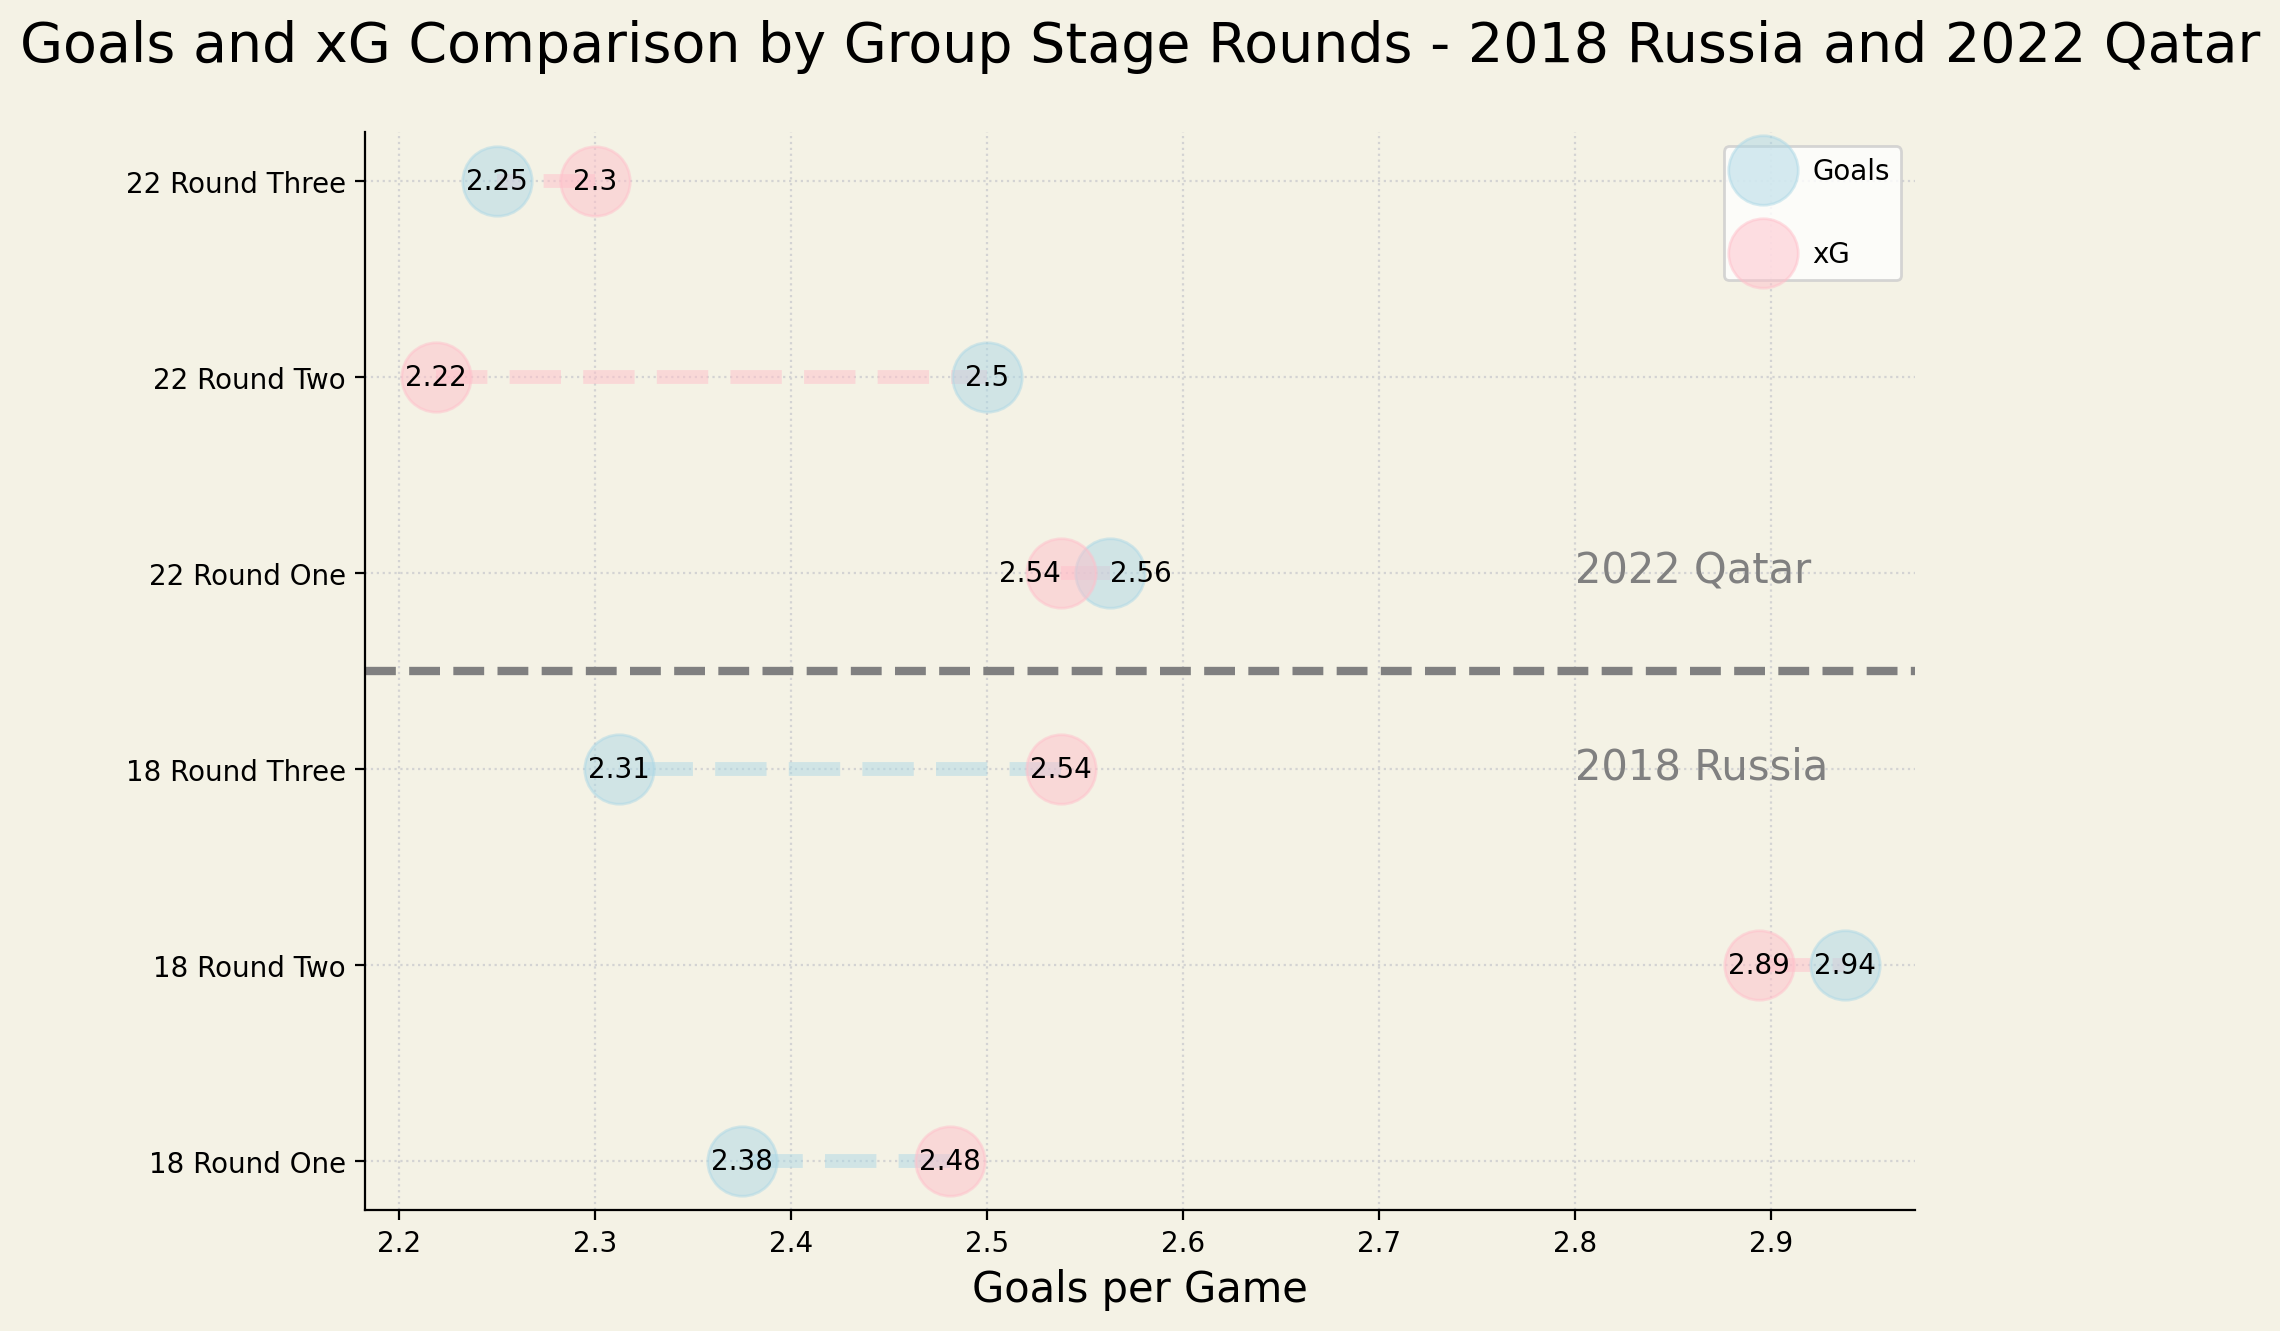

In [163]:
fig = plt.figure(figsize = (10,7), dpi = 200, facecolor = '#f4f2e5')

ax = plt.subplot(111)
ax.set_facecolor("#f4f2e5")

ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)

ax.grid(True, color="lightgrey", ls=":")

ax.plot(df['Gls'], df['Stage'], 'o', color="lightblue", markersize=25, linestyle="none", zorder=3, label="Goals", alpha=0.5)
ax.plot(df['xG'], df['Stage'], 'o', color="pink", markersize=25, linestyle="none", zorder=3, label="xG", alpha=0.5)

ax.plot( (2.3, 2.25), (5,5), linewidth=5, linestyle="dashed", color="pink", alpha=0.5)
ax.plot( (2.21875, 2.5), (4,4), linewidth=5, linestyle="dashed", color="pink", alpha=0.5)
ax.plot( (2.53750, 2.5625), (3,3), linewidth=5, linestyle="dashed", color="pink", alpha=0.5)
ax.plot( (2.53750, 2.3125), (2,2), linewidth=5, linestyle="dashed", color="lightblue", alpha=0.5)
ax.plot( (2.89375, 2.9375), (1,1), linewidth=5, linestyle="dashed", color="pink", alpha=0.5)
ax.plot( (2.48125, 2.3750), (0,0), linewidth=5, linestyle="dashed", color="lightblue", alpha=0.5)

ax.axhline(2.5, linewidth=3, linestyle="dashed", color="grey")

ax.text(2.8, 2.95, s="2022 Qatar", fontsize="15", color="grey")
ax.text(2.8, 1.95, s="2018 Russia", fontsize="15", color="grey")

for i in range(len(df)):
    if abs(df['Gls'][i] - df['xG'][i]) > 0.04:
        ax.text(df['xG'][i], i, s=round(df['xG'][i], 2), verticalalignment="center", horizontalalignment="center")
        ax.text(df['Gls'][i], i, s=round(df['Gls'][i], 2), verticalalignment="center", horizontalalignment="center")    
    else:
        ax.text(df['xG'][i], i, s=round(df['xG'][i], 2), verticalalignment="center", horizontalalignment="right")
        ax.text(df['Gls'][i], i, s=round(df['Gls'][i], 2), verticalalignment="center", horizontalalignment="left")    
        
ax.set_title("Goals and xG Comparison by Group Stage Rounds - 2018 Russia and 2022 Qatar", fontsize=20, y=1.05)

ax.set_xlabel("Goals per Game", fontsize=15)

legend = ax.legend(labelspacing=2)

plt.show()